<a href="https://colab.research.google.com/github/Hartuty/Machinelearning/blob/master/Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
m=0
c=0
L=0.0001 #learning rate
epoch=100 #number of iterations
epoch_error_list=[]
epoch_count_list=[]

In [152]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data (12).csv


In [0]:
data=pd.read_csv('data.csv',header=0) #reading the data from csv imported

In [0]:
#defining X and Y
X=data['size_in_sq_ft'] 
Y=data['price_x1000_sh']
N=float(len(X))

The next code block defines how to calculate the mean squared error.

In [0]:
def mse(N,Y,Y_hat):
  return (1/N)*sum(Y-Y_hat)**2

Gradient descent fit outlines the best possible line that could fit through a data set

In [0]:
def gradient_descent_fit(m,c,N,L):
    for i in range(epoch):
      Y_hat=m*X+c
      epoch_count_list.append(i)
      epoch_error=mse(N,Y,Y_hat)
      epoch_error_list.append(epoch_error)
      D_m=(-2/N)*sum(X*(Y-Y_hat))
      D_c=(-2/N)*sum(Y-Y_hat)
      m=m-(L*D_m)
      c=c-(L*D_c)
    print("final m is ",m," final c is ",c)
    return Y_hat

The next code block defines a function for L2 Regularization. The function takes two arrays as input which are X the independent data set and Y as a feature/ dependent variable.
We used the equation
    L2=(wx+b-y)^2 - lambda * absolute value of W
    its derivative become

    (-2/N)*summation(X*(Y-Y_hat))-(2*lambda provided * W)
    


In [0]:
def l2_reg(X,Y):
  l=1.5
  w = 1
  b = 0
  N = float(len(X))
  for i in range(epoch):
    Y_hat = w * X + b
    D_w = (-2/N) * sum(X * (Y - Y_hat)) - (2 * l * w)
    D_b = (-2/N) * sum(Y - Y_hat)

    w = w - (L * D_w)
    b = b - (L * D_b)
  print("Final l2 weight ", w, "final beta is ", b)
  return Y_hat

For the L1 regularization, it is similar to the L2 regularization but the part for error is different. it uses the absolute value of W

Limitations of L2 is that when using the absolute value of W, W cannot be 0 such that if

W=x-1
x cannot be 0. 

This is because the function not continous at when x=0 at the sharp curve hence not differentiable

Using our dataset, When is set to 0 the value that will be gotten will be the same as the gradient_descent_fit with regularization.

The value of lambda is manually set to be 1.5

The derivative for absolute value of w is calculated as below:

d/dw (|w|)
  = d/dw (sqroot(w^2).

  =Chain Rule

  =d/dw(w^2)/(1/2sqroot(w^2)

  =w/sqroot(w^2)

  =w/(|w|)

=using abs of python we calculated the function

In [0]:
def l1_reg(X,Y):
  l=1.5
  w = 1
  b = 0
  N = float(len(X))
  for i in range(epoch):
    Y_hat = w * X + b
    D_w = (-2/N) * sum(X * (Y - Y_hat)) - l * (w/abs(w))
    D_b = (-2/N) * sum(Y - Y_hat)
    w = w - (L * D_w)
    b = b - (L * D_b)
  print("final weight is", w, "final beta is", b)
  return Y_hat

The last code block contains the results of the whole code. It contains the Gradient descent Y_hat

Contains both Lasso and Ridge Regularization and their Respective Graphs

final m is  1.4788027175308887  final c is  0.03507497059521459
final weight is 1.4794952303588504 final beta is 0.01515400542226122
Final l2 weight  1.4800962063369065 final beta is  0.014593778825164806


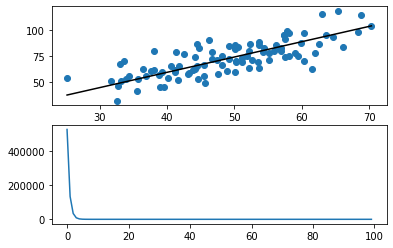

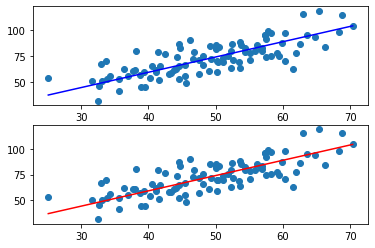

In [159]:
fig,(ax1,ax2)=plt.subplots(2)
ax1.scatter(X,Y)
Y_hat=gradient_descent_fit(m,c,N,L)
ax1.plot([min(X),max(X)],[min(Y_hat),max(Y_hat)],color='black')
ax2.plot(epoch_count_list,epoch_error_list)
epoch_error_list.clear()
l1Y_hat=l1_reg(X,Y)
l2Y_hat=l2_reg(X,Y)
fig,(ax3,ax4)=plt.subplots(2)
ax3.scatter(X,Y)
ax3.plot([min(X),max(X)],[min(l1Y_hat),max(l1Y_hat)],color='blue')
ax4.scatter(X,Y)
ax4.plot([min(X),max(X)],[min(l2Y_hat),max(l2Y_hat)],color='red')

